In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Data manipulation and numerical operations
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

# Machine learning and model evaluation
from sklearn.metrics import mean_squared_error

# Deep learning
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, SimpleRNN, GRU
from keras.callbacks import EarlyStopping


# Set matplotlib default figure size
plt.rcParams["figure.figsize"] = (20, 20)
%matplotlib inline


In [2]:
# load data
df = pd.read_csv('BTC-USD.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
# keep only Date and Close column
df = df[['Date', 'Close']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2881 non-null   object 
 1   Close   2881 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.1+ KB


In [5]:
#check missing values
df.isnull().sum()

,0
Date,0
Close,0


In [6]:
# correcting 'Date' format
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
# set date as index
df.set_index('Date', drop= True, inplace = True)

## Data Preparation

The **prepare_data** function is designed to shape time series data for use with RNNs, LSTMs, and GRUs, which are types of neural networks that handle sequences well. *It does this by creating input sequences and their corresponding output values*.
- For *each position in the data, starting from the number of steps defined by the lookback parameter*, it collects a sequence of past values and pairs it with the next value in the series as the output.
- This way, the function builds pairs of input-output sequences where each input consists of a fixed number of past observations and the output is the subsequent value.

These models—RNNs, LSTMs, and GRUs—are built to process such sequential data, learning from the temporal dependencies between past and future values. *The lookback parameter is crucial because it defines how many previous time steps are considered to predict the next value*.



The resulting data is structured in a 3D array with the shape (number_of_sequences, lookback, number_of_features). In this format:
- The first dimension represents different sequences or samples.
- The second dimension represents the time steps within each sequence (the lookback period).
- The third dimension represents the features at each time step (which is often 1 for a single variable time series).

In [8]:
# function to prepare the data
def prepare_data(data,lookback):
    # generate the input and output sequences
    X_ = []
    Y_ = []

    for i in range(lookback, len(data)):
        X_.append(data[i - lookback: i])
        Y_.append(data[i: i + 1])

    X_ = np.array(X_)
    Y_ = np.array(Y_)
    return(X_,Y_)

In [9]:
# lookback
lb = 2
testSize = int(len(df)*0.2)
testData = df.values[-testSize:]


# train_test_split
# 80% train and 20% test
df = pd.DataFrame(df)
train, test = df.values[:len(df)- testSize - lb], df.values[len(df)- testSize -lb:]

In [10]:
#preparing the train and test data
x_train, y_train = prepare_data(train,lb)
x_test, y_test = prepare_data(test,lb)

# RNN

In [11]:
def modelRNN(X,Y,X_t, Y_t, epochs = 20):

    # model architecture
    model = Sequential()
    model.add(SimpleRNN(30, activation='relu', return_sequences=True))
    model.add(SimpleRNN(20, activation='relu', return_sequences=True))
    model.add(SimpleRNN(10, activation='relu', return_sequences=True))
    model.add(SimpleRNN(5, activation='relu'))
    model.add(Dense(1))


    # compile the model
    model.compile(optimizer = "adam", loss='mae')


    # fit the model
    history = model.fit(x_train, y_train, epochs=epochs ,batch_size = 3, validation_split=0.2, verbose=2, shuffle=False, validation_data=(X_t, Y_t))
    y_p = model.predict(X_t)

    return model, history, y_p

In [12]:
modelRNN, historyRNN, predictRNN = modelRNN(x_train, y_train,x_test, y_test, epochs = 100)

Epoch 1/100
767/767 - 16s - 21ms/step - loss: 231.0822 - val_loss: 2551.9941
Epoch 2/100
767/767 - 4s - 6ms/step - loss: 194.7035 - val_loss: 2487.0432
Epoch 3/100
767/767 - 4s - 6ms/step - loss: 185.3784 - val_loss: 2426.1804
Epoch 4/100
767/767 - 3s - 4ms/step - loss: 178.6732 - val_loss: 2451.3525
Epoch 5/100
767/767 - 5s - 6ms/step - loss: 175.9752 - val_loss: 1782.5629
Epoch 6/100
767/767 - 4s - 6ms/step - loss: 173.3111 - val_loss: 2291.3076
Epoch 7/100
767/767 - 4s - 5ms/step - loss: 172.9982 - val_loss: 2324.7881
Epoch 8/100
767/767 - 3s - 4ms/step - loss: 168.7344 - val_loss: 1328.1033
Epoch 9/100
767/767 - 3s - 4ms/step - loss: 165.4427 - val_loss: 2809.2324
Epoch 10/100
767/767 - 4s - 6ms/step - loss: 169.0509 - val_loss: 1463.3306
Epoch 11/100
767/767 - 3s - 4ms/step - loss: 164.4209 - val_loss: 2500.7844
Epoch 12/100
767/767 - 3s - 4ms/step - loss: 166.4401 - val_loss: 2342.3596
Epoch 13/100
767/767 - 7s - 9ms/step - loss: 163.0554 - val_loss: 1746.5447
Epoch 14/100
767/76

RNN plot


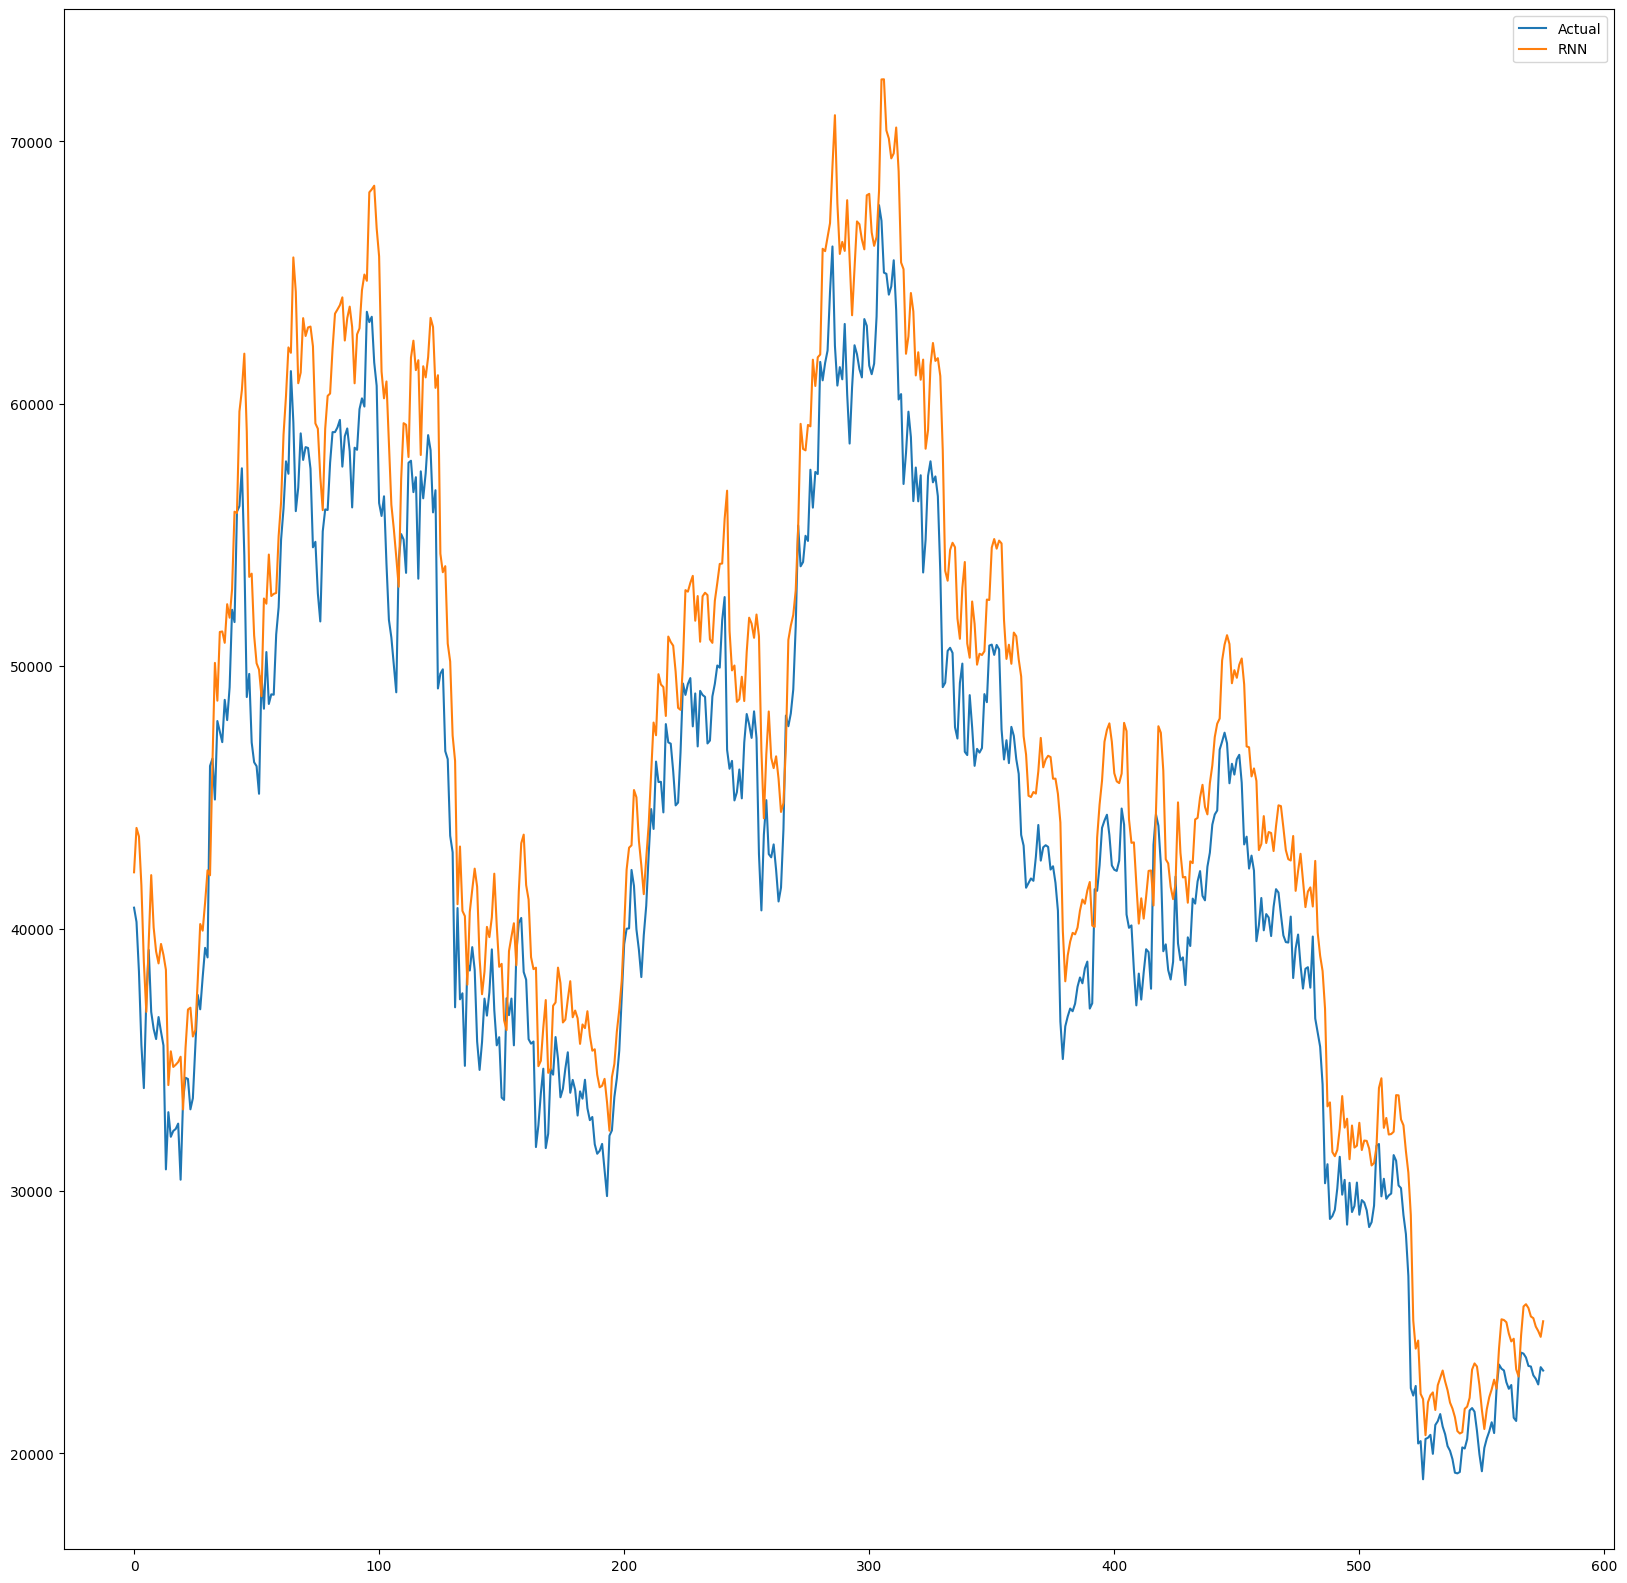

In [13]:
print('RNN plot')
plt.plot(testData, label = 'Actual')
plt.plot(predictRNN, label = 'RNN')
plt.legend()

In [14]:
rmseRNN = mean_squared_error(testData, predictRNN, squared = False)
print(f'RMSE RNN {rmseRNN}')

RMSE RNN 3919.355097326978


# LSTM

In [15]:
def modelLSTM(X,Y,X_t, Y_t, epochs = 20):


    # define model architecture
    model = Sequential()
    model.add(LSTM(30, activation='relu', return_sequences=True))
    model.add(LSTM(20, activation='relu', return_sequences=True))
    model.add(LSTM(10, activation='relu', return_sequences=True))
    model.add(LSTM(5, activation='relu'))
    model.add(Dense(1))


    # compile the model
    model.compile(optimizer = "adam", loss='mae')


    # fit the model
    history = model.fit(x_train, y_train, epochs=epochs ,batch_size = 3, validation_split=0.2, verbose=2, shuffle=False, validation_data=(X_t, Y_t))
    y_p = model.predict(X_t)

    return model, history, y_p

In [16]:
modelLSTM, historyLSTM, predictLSTM = modelLSTM(x_train, y_train,x_test, y_test, epochs =100)

Epoch 1/100
767/767 - 12s - 16ms/step - loss: 253.9896 - val_loss: 3199.3367
Epoch 2/100
767/767 - 6s - 8ms/step - loss: 202.6738 - val_loss: 3001.3838
Epoch 3/100
767/767 - 5s - 7ms/step - loss: 207.4978 - val_loss: 3463.1921
Epoch 4/100
767/767 - 7s - 9ms/step - loss: 211.7204 - val_loss: 3392.6982
Epoch 5/100
767/767 - 9s - 12ms/step - loss: 202.7264 - val_loss: 3269.5474
Epoch 6/100
767/767 - 8s - 11ms/step - loss: 197.8128 - val_loss: 3085.5791
Epoch 7/100
767/767 - 5s - 7ms/step - loss: 200.7408 - val_loss: 2628.3518
Epoch 8/100
767/767 - 6s - 7ms/step - loss: 203.8387 - val_loss: 2906.7488
Epoch 9/100
767/767 - 4s - 6ms/step - loss: 195.8659 - val_loss: 2774.0459
Epoch 10/100
767/767 - 6s - 8ms/step - loss: 189.8631 - val_loss: 2884.5986
Epoch 11/100
767/767 - 9s - 12ms/step - loss: 192.2877 - val_loss: 2784.2041
Epoch 12/100
767/767 - 5s - 7ms/step - loss: 190.2301 - val_loss: 2834.3455
Epoch 13/100
767/767 - 9s - 11ms/step - loss: 192.7290 - val_loss: 2765.0374
Epoch 14/100
76

LSTM plot


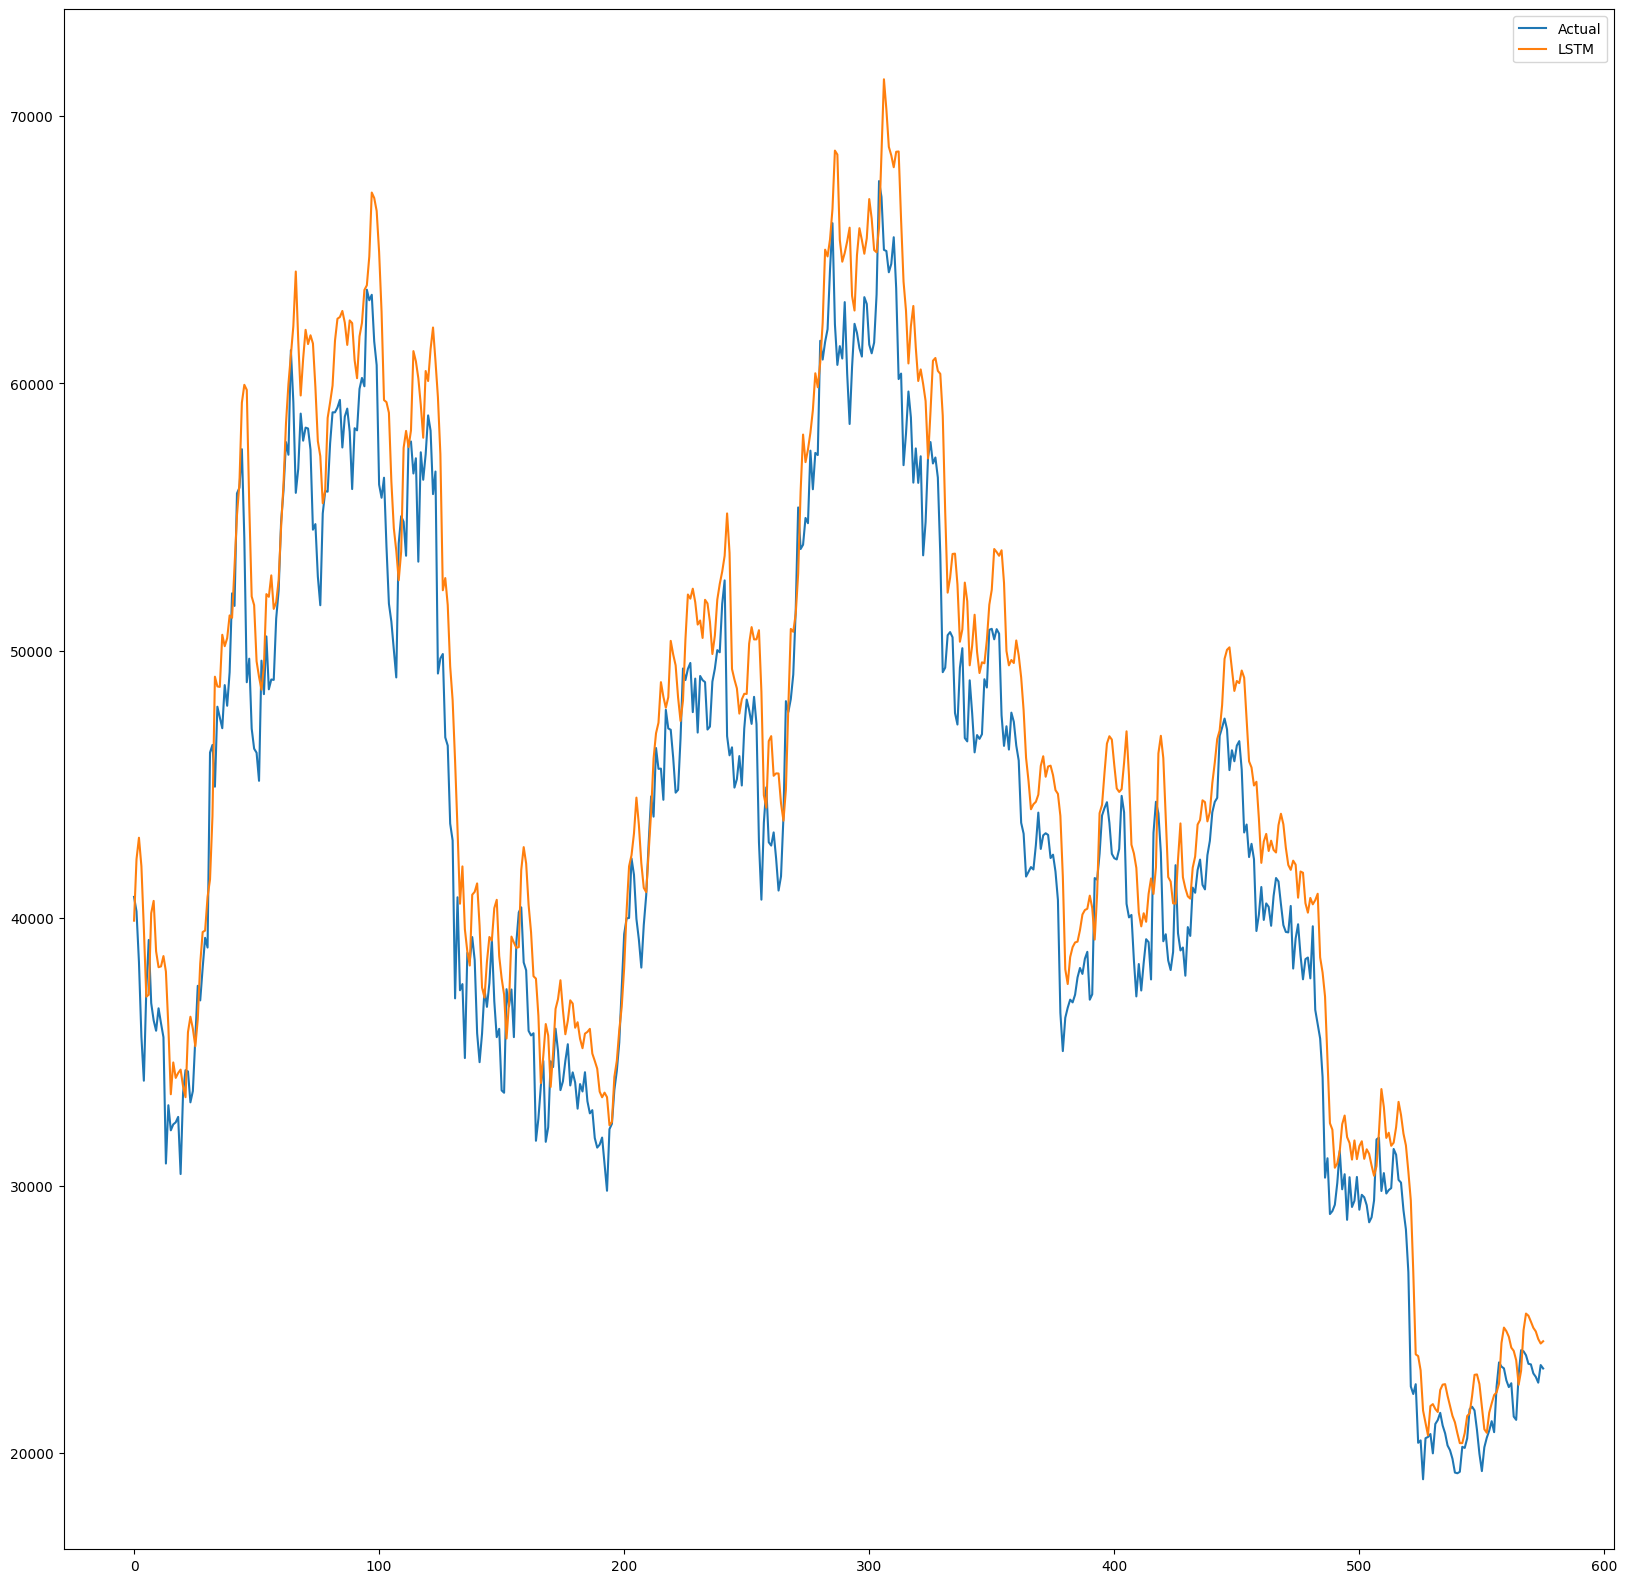

In [17]:
print('LSTM plot')
plt.plot(testData, label = 'Actual')
plt.plot(predictLSTM, label = 'LSTM')
plt.legend()

In [18]:
rmseLSTM = mean_squared_error(testData, predictLSTM, squared = False)
print(f'RMSE RNN {rmseLSTM}')

RMSE RNN 3328.6016860939403


# GRU

In [19]:
def modelGRU(X,Y,X_t, Y_t, epochs = 20):


    # define model
    model = Sequential()
    model.add(GRU(30, activation='relu', return_sequences=True))
    model.add(GRU(20, activation='relu', return_sequences=True))
    model.add(GRU(10, activation='relu', return_sequences=True))
    model.add(GRU(5, activation='relu'))
    model.add(Dense(1))


    # compile the model
    model.compile(optimizer ='adam', loss='mae')


    # fit the model
    history = model.fit(x_train, y_train, epochs=epochs ,batch_size = 3, validation_split=0.2, verbose=2, shuffle=False, validation_data=(X_t, Y_t))
    y_p = model.predict(X_t)

    return model, history, y_p

In [20]:
modelGRU, historyGRU, predictGRU = modelGRU(x_train, y_train,x_test, y_test, epochs = 100)

Epoch 1/100
767/767 - 13s - 16ms/step - loss: 225.3600 - val_loss: 3885.1592
Epoch 2/100
767/767 - 5s - 7ms/step - loss: 184.3696 - val_loss: 3959.8867
Epoch 3/100
767/767 - 9s - 12ms/step - loss: 180.2809 - val_loss: 3035.9170
Epoch 4/100
767/767 - 5s - 7ms/step - loss: 176.6637 - val_loss: 3050.5010
Epoch 5/100
767/767 - 9s - 12ms/step - loss: 177.5690 - val_loss: 3194.8730
Epoch 6/100
767/767 - 6s - 8ms/step - loss: 169.8470 - val_loss: 2737.6846
Epoch 7/100
767/767 - 11s - 14ms/step - loss: 174.2343 - val_loss: 2969.2798
Epoch 8/100
767/767 - 4s - 5ms/step - loss: 169.8544 - val_loss: 2609.4712
Epoch 9/100
767/767 - 5s - 7ms/step - loss: 168.6510 - val_loss: 2439.2092
Epoch 10/100
767/767 - 6s - 8ms/step - loss: 166.7673 - val_loss: 2527.8623
Epoch 11/100
767/767 - 10s - 13ms/step - loss: 165.9235 - val_loss: 2526.4788
Epoch 12/100
767/767 - 4s - 6ms/step - loss: 165.3831 - val_loss: 2384.6646
Epoch 13/100
767/767 - 4s - 5ms/step - loss: 162.3286 - val_loss: 2643.5105
Epoch 14/100


GRU plot


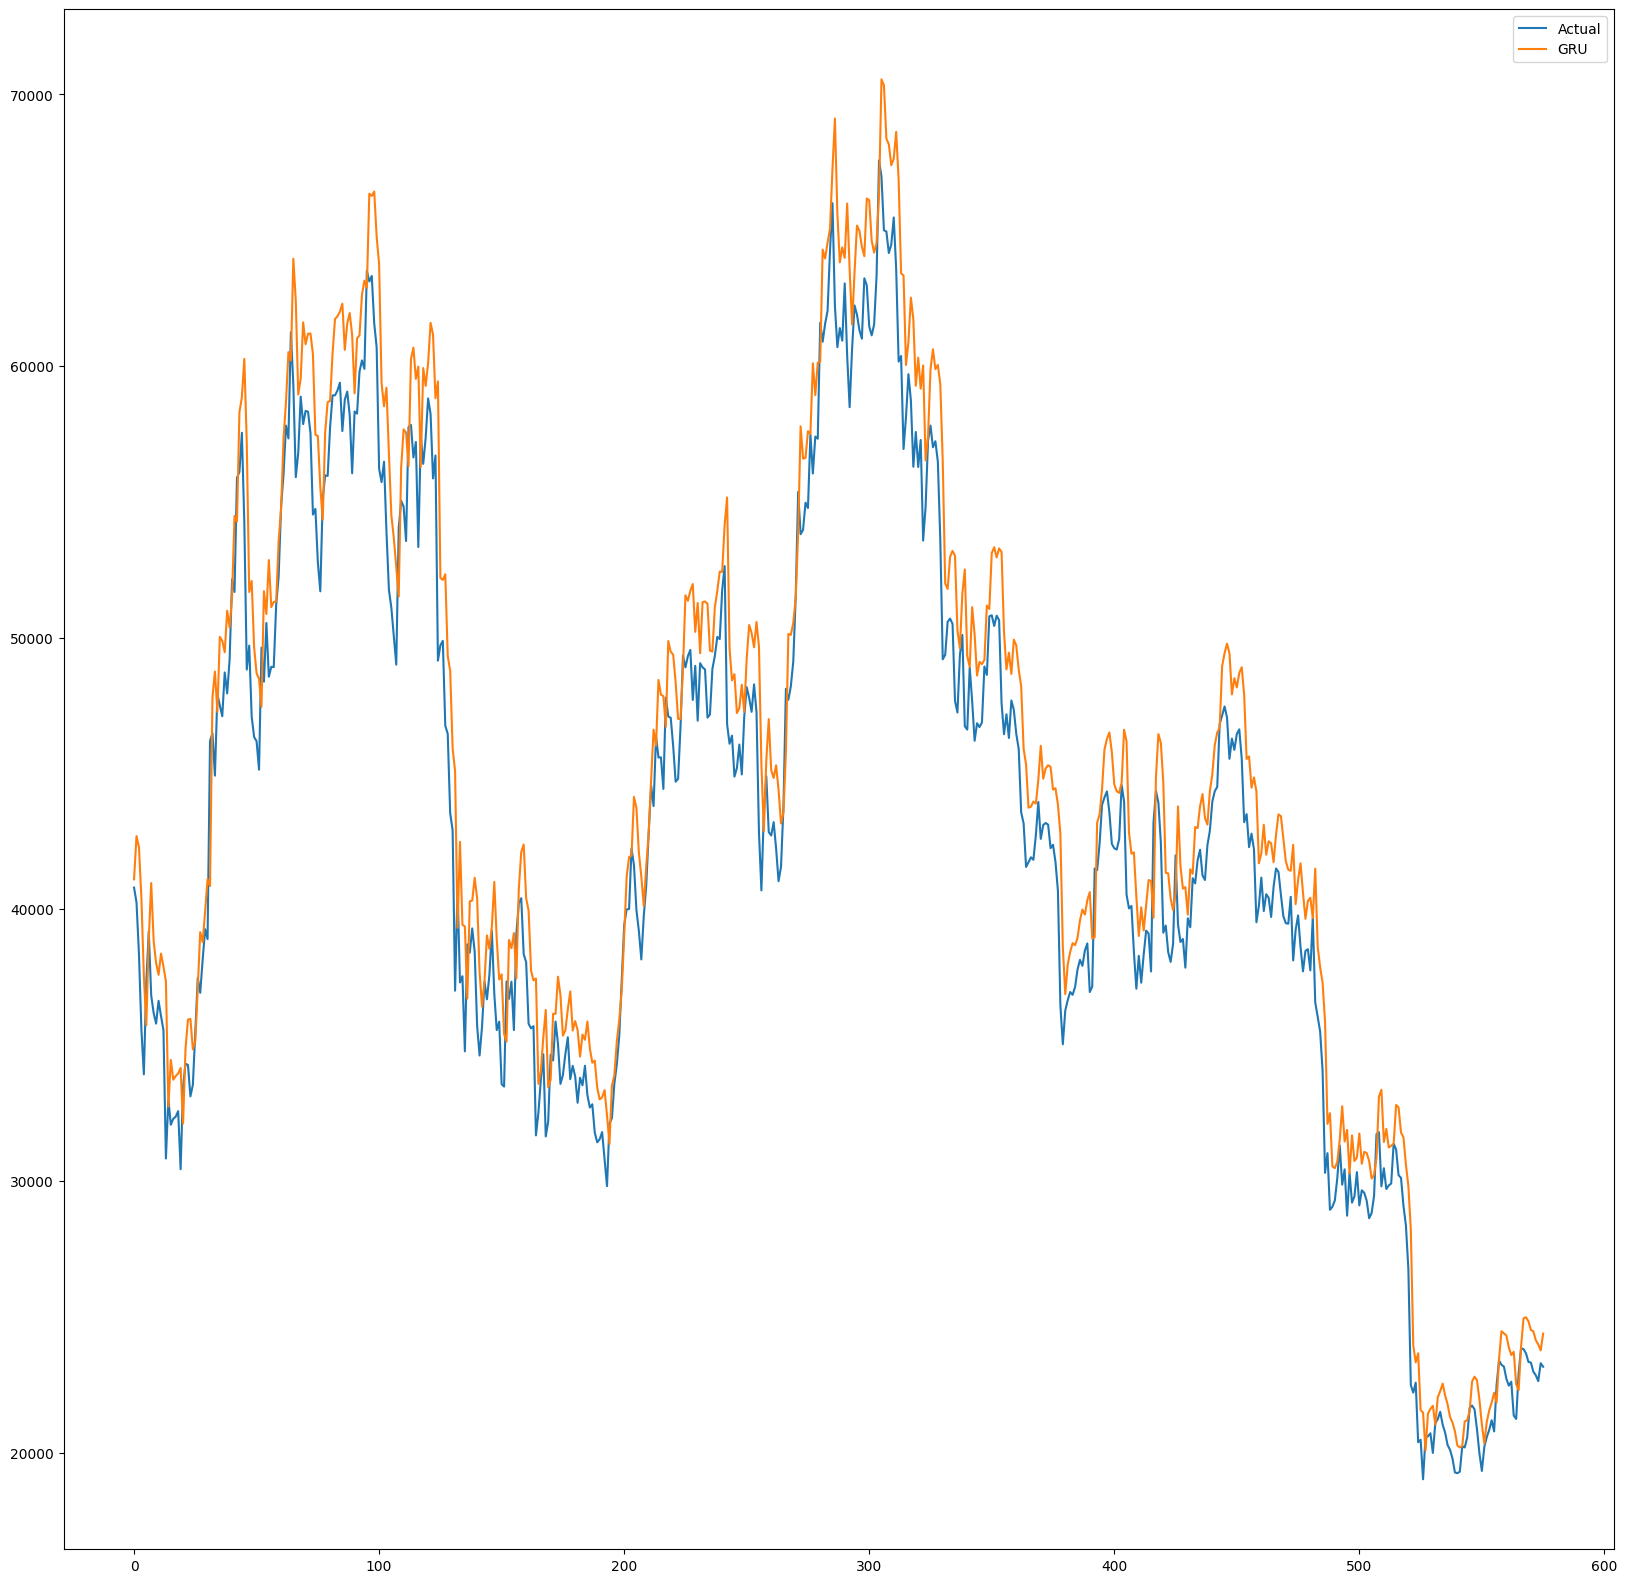

In [21]:
print('GRU plot')
plt.plot(testData, label = 'Actual')
plt.plot(predictGRU, label = 'GRU')
plt.legend()

In [22]:
rmseGRU = mean_squared_error(testData, predictGRU, squared = False)
print(f'RMSE GRU {rmseGRU}')

RMSE GRU 2791.390703689883


# Comparison

Comparison plot


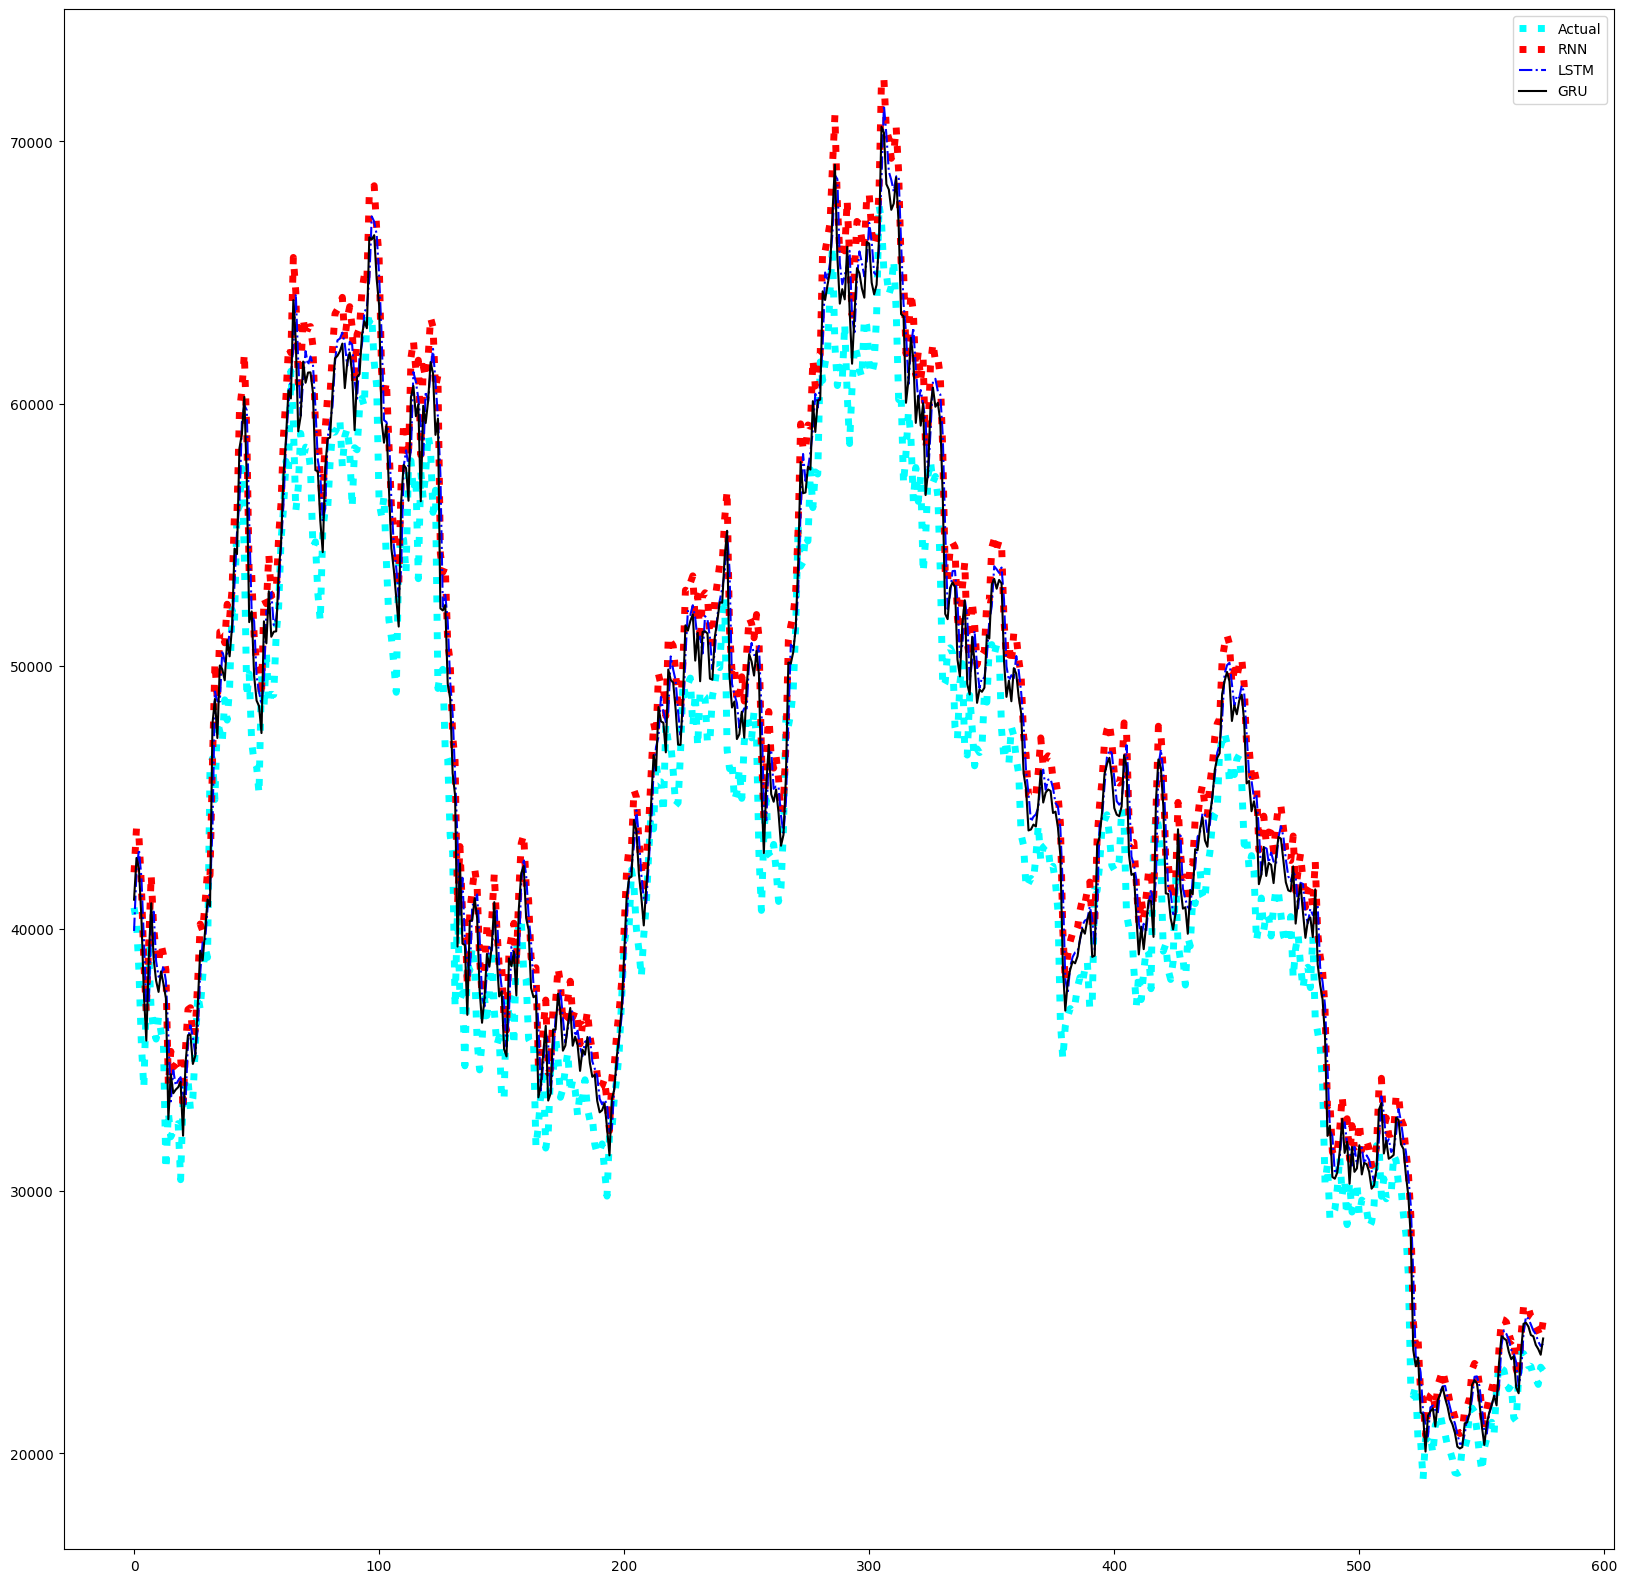

In [23]:
print('Comparison plot')
plt.plot(testData, label = 'Actual', linestyle='dotted', linewidth = 5, color = 'cyan')
plt.plot(predictRNN, label = 'RNN', linestyle='dotted', linewidth = 5, color = 'red')
plt.plot(predictLSTM, label = 'LSTM',linestyle = 'dashdot', color = 'blue')
plt.plot(predictGRU, label = 'GRU', color = 'black')
plt.legend()

In [24]:
# making a RMSE dataframe
rmse = {'rmseGRU': rmseGRU, 'rmseLSTM': rmseLSTM, 'rmseRNN': rmseRNN}
rmse = pd.DataFrame(rmse.values(), index = rmse.keys(), columns = ['RMSE'])
rmse = rmse.sort_values(by = 'RMSE')
rmse

,RMSE
rmseGRU,2791.390704
rmseLSTM,3328.601686
rmseRNN,3919.355097


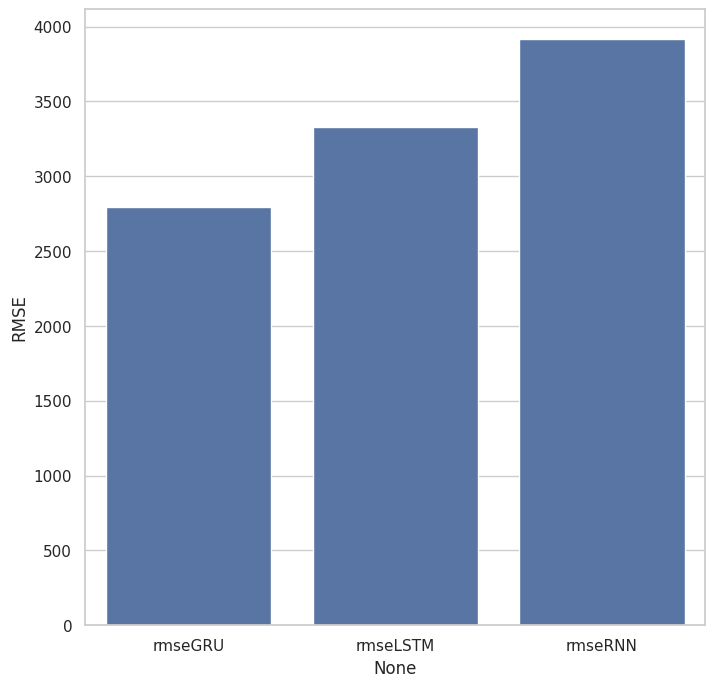

In [25]:
plt.rcParams["figure.figsize"] = (8,8)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=rmse.index, y= rmse['RMSE'])